# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.shape

(440, 8)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


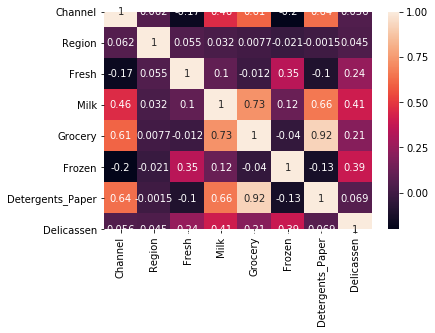

In [8]:
sns.heatmap(customers.corr(), annot=True);

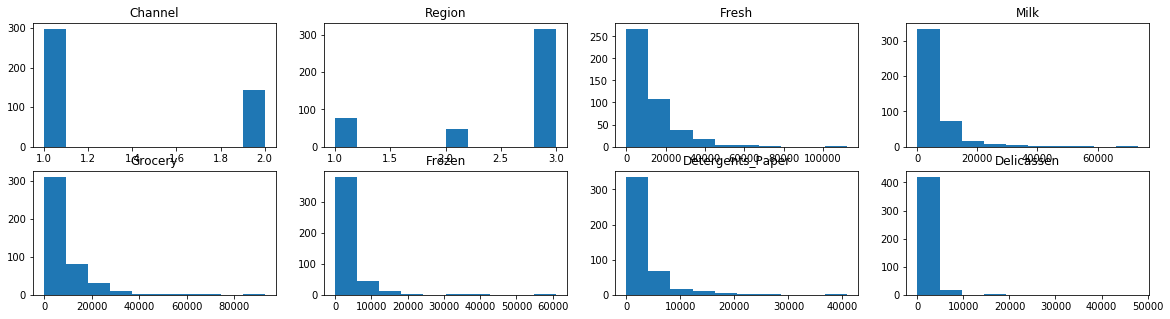

In [9]:
fig, axs = plt.subplots(2,4, figsize=(20,5))

axs[0,0].hist(customers['Channel'])
axs[0,0].set_title('Channel')

axs[0,1].hist(customers['Region'])
axs[0,1].set_title('Region')

axs[0,2].hist(customers['Fresh'])
axs[0,2].set_title('Fresh')

axs[0,3].hist(customers['Milk'])
axs[0,3].set_title('Milk')

axs[1,0].hist(customers['Grocery'])
axs[1,0].set_title('Grocery')

axs[1,1].hist(customers['Frozen'])
axs[1,1].set_title('Frozen')

axs[1,2].hist(customers['Detergents_Paper'])
axs[1,2].set_title('Detergents_Paper')

axs[1,3].hist(customers['Delicassen'])
axs[1,3].set_title('Delicassen')

plt.show()

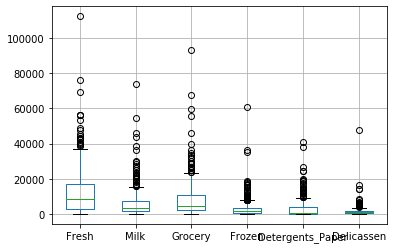

In [10]:
customers.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
plt.show()

In [11]:
customers.shape[0] * 0.2

88.0

In [12]:
customers.sort_values(by='Fresh', ascending=False, inplace=True)
customers['Fresh'][:88].sum() / customers['Fresh'].sum() * 100

52.67331435526884

In [13]:
customers.sort_values(by='Milk', ascending=False, inplace=True)
customers['Milk'][:88].sum() / customers['Milk'].sum() * 100

56.05415241866139

In [14]:
customers.sort_values(by='Grocery', ascending=False, inplace=True)
customers['Grocery'][:88].sum() / customers['Grocery'].sum() * 100

55.68736526607218

In [15]:
customers.sort_values(by='Frozen', ascending=False, inplace=True)
customers['Frozen'][:88].sum() / customers['Frozen'].sum() * 100

62.38138571375727

In [16]:
customers.sort_values(by='Detergents_Paper', ascending=False, inplace=True)
customers['Detergents_Paper'][:88].sum() / customers['Detergents_Paper'].sum() * 100

69.7065994035605

In [17]:
customers.sort_values(by='Delicassen', ascending=False, inplace=True)
customers['Delicassen'][:88].sum() / customers['Delicassen'].sum() * 100

57.389375848619025

In [18]:
# Your observations here

In [19]:
"""
What does each column mean?
- Channel is HORECA or Retail
- Region is Lisbon, Oporto or Other
- the rest of the columns are the annual spending (m.u.) on the respective product

Any categorical data to convert?
No, all data is in int type.

Any missing data to remove?
No, there are no nulls.

Column collinearity - any high correlations?
There is a high correlation between Detergents_Paper and Grocery.

Descriptive statistics - any outliers to remove?
Yes, there are outliers in all product columns, because the variance is higher than the mean.
It's also visible in the boxplots.

Column-wise data distribution - is the distribution skewed?
From the histograms the distributions look skewed right, because the outliers are high values.

Pareto principle
Analysing the product columns, after sorting each by descending order, I got that the first 20% of the data have about 50-60%
of the total spending, so not the 80% of the Pareto principle.
"""

"\nWhat does each column mean?\n- Channel is HORECA or Retail\n- Region is Lisbon, Oporto or Other\n- the rest of the columns are the annual spending (m.u.) on the respective product\n\nAny categorical data to convert?\nNo, all data is in int type.\n\nAny missing data to remove?\nNo, there are no nulls.\n\nColumn collinearity - any high correlations?\nThere is a high correlation between Detergents_Paper and Grocery.\n\nDescriptive statistics - any outliers to remove?\nYes, there are outliers in all product columns, because the variance is higher than the mean.\nIt's also visible in the boxplots.\n\nColumn-wise data distribution - is the distribution skewed?\nFrom the histograms the distributions look skewed right, because the outliers are high values.\n\nPareto principle\nAnalysing the product columns, after sorting each by descending order, I got that the first 20% of the data have about 50-60%\nof the total spending, so not the 80% of the Pareto principle.\n"

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [20]:
# Your code here
def whisker(x):
    return x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))

In [21]:
whisker(customers['Fresh'])

37642.75

In [22]:
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] :
    customers = customers[customers[col] < whisker(customers[col])]

In [23]:
customers.shape

(318, 8)

In [24]:
(440 - 318) / 440 * 100

27.727272727272727

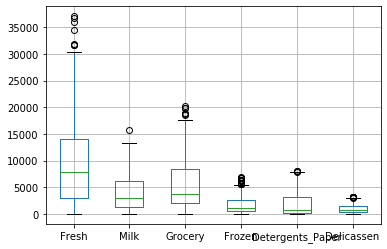

In [25]:
customers.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], showcaps=True)
plt.show()

In [26]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,1.270440,2.559748,9718.166667,3989.176101,5563.682390,1799.654088,1840.603774,984.191824
std,0.444887,0.770851,8200.115705,3260.597084,4623.066729,1612.664020,2206.607239,785.423600
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3044.000000,1329.500000,2001.500000,575.250000,228.750000,360.250000
50%,1.000000,3.000000,7801.500000,3045.000000,3815.500000,1194.500000,675.000000,746.000000
75%,2.000000,3.000000,14084.750000,6188.000000,8435.500000,2559.500000,3273.000000,1441.500000
max,2.000000,3.000000,37036.000000,15729.000000,20292.000000,6845.000000,8077.000000,3271.000000


In [27]:
# Your comment here
"""
I've removed all the outliers that were bigger than the max whisker.
I've lost about 28% of the inicial data but have better (lower) variances now.
"""

"\nI've removed all the outliers that were bigger than the max whisker.\nI've lost about 28% of the inicial data but have better (lower) variances now.\n"

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [28]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [29]:
# Your code here:
from sklearn.cluster import KMeans

cluster = KMeans()
model = cluster.fit(customers_scale)

customers['labels'] = model.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
138,1,3,13537,4257,5034,155,249,3271,1
156,2,3,3830,5291,14855,317,6694,3182,5
18,2,3,18601,6327,10099,2205,2767,3181,5
89,1,3,24904,3836,5330,3443,454,3178,1
373,2,3,15076,6257,7398,1504,1916,3113,5


Count the values in `labels`.

In [30]:
# Your code here:
customers['labels'].value_counts()

2    95
6    42
5    37
3    35
7    34
4    32
1    23
0    20
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [31]:
# Your code here
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.5)
model = cluster.fit(customers_scale)

customers['labels_DBSCAN'] = model.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
138,1,3,13537,4257,5034,155,249,3271,1,-1
156,2,3,3830,5291,14855,317,6694,3182,5,-1
18,2,3,18601,6327,10099,2205,2767,3181,5,-1
89,1,3,24904,3836,5330,3443,454,3178,1,-1
373,2,3,15076,6257,7398,1504,1916,3113,5,-1


Count the values in `labels_DBSCAN`.

In [32]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    298
 0     13
 1      7
Name: labels_DBSCAN, dtype: int64

In [33]:
"""
There is a lot of noise...
"""

'\nThere is a lot of noise...\n'

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

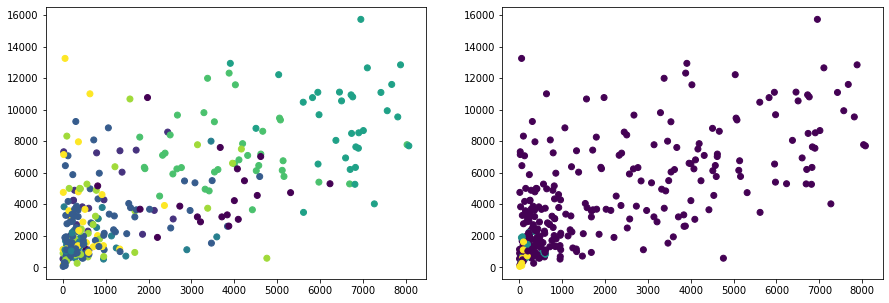

In [34]:
# Your code here:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels)
axs[1].scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels_DBSCAN)
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

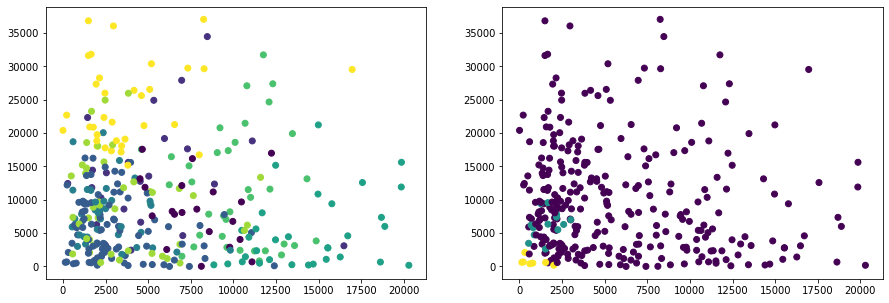

In [35]:
# Your code here:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels)
axs[1].scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels_DBSCAN)
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

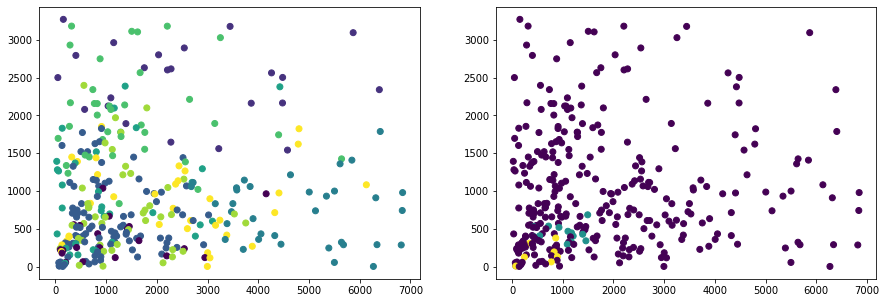

In [36]:
# Your code here:
fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels)
axs[1].scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels_DBSCAN)
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [37]:
# Your code here:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,2.000000,2.700000,8560.250000,4499.250000,7856.450000,1180.350000,3432.400000,372.200000,-1.000000
1,1.000000,2.869565,13795.739130,4055.304348,5108.000000,2587.130435,832.652174,2441.739130,-1.000000
2,1.000000,2.957895,5551.105263,2430.547368,3000.684211,1026.642105,699.326316,619.705263,-0.715789
3,1.028571,2.342857,7917.828571,1835.171429,2740.085714,4756.657143,681.057143,733.885714,-1.000000
4,1.906250,2.687500,5093.906250,9321.000000,14338.250000,1105.781250,6574.187500,934.000000,-1.000000
5,1.972973,2.837838,11437.621622,7286.243243,10081.648649,1461.378378,3877.405405,2006.459459,-1.000000
6,1.000000,1.119048,9296.904762,2877.428571,3592.047619,1381.333333,900.000000,772.309524,-1.000000
7,1.000000,2.735294,24138.941176,2983.911765,3851.735294,2285.088235,458.882353,830.794118,-1.000000


In [38]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.288591,2.530201,10077.583893,4187.070470,5847.204698,1862.822148,1952.365772,1026.741611,3.627517
0,1.000000,3.000000,6319.230769,1258.307692,1629.000000,1010.923077,226.923077,445.384615,2.000000
1,1.000000,3.000000,729.571429,636.142857,801.000000,575.285714,79.571429,173.428571,2.000000


Which algorithm appears to perform better?

In [39]:
# Your observations here
"""
The DBSCAN appears to perform better, by the visualization of the clusters in the plot and because the means are more
distinct of each other. In the K-Means model the clusters and the means are quite overllaped.
"""

'\nThe DBSCAN appears to perform better, by the visualization of the clusters in the plot and because the means are more\ndistinct of each other. In the K-Means model the clusters and the means are quite overllaped.\n'

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


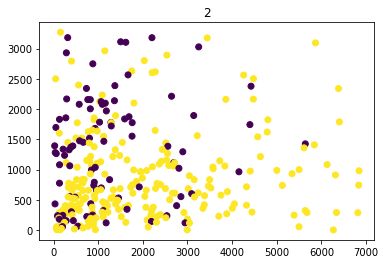

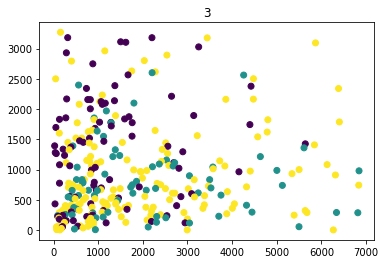

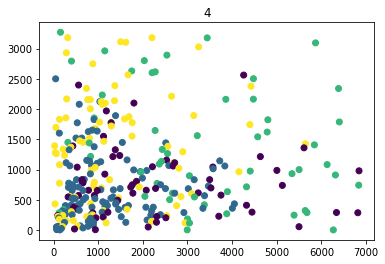

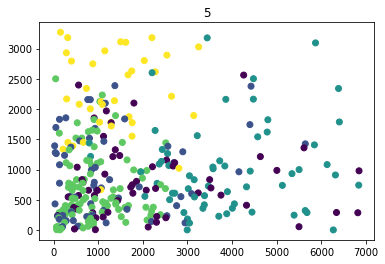

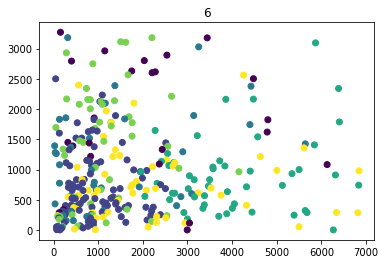

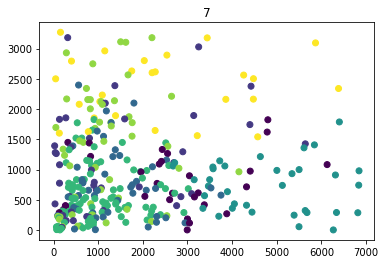

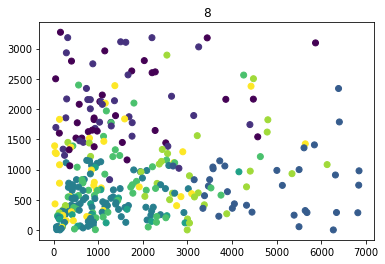

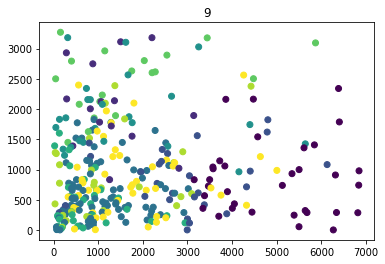

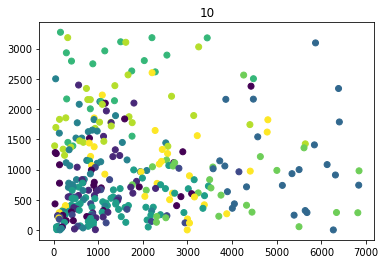

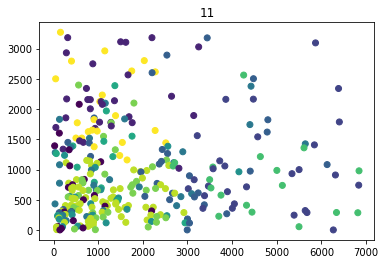

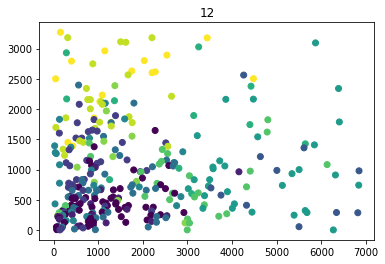

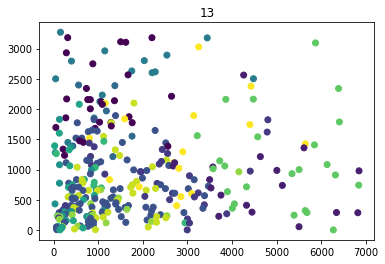

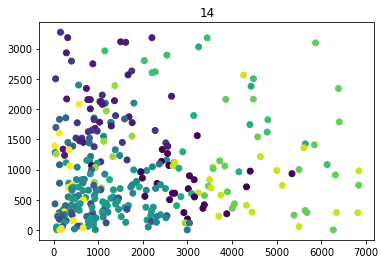

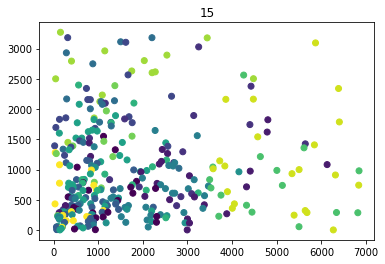

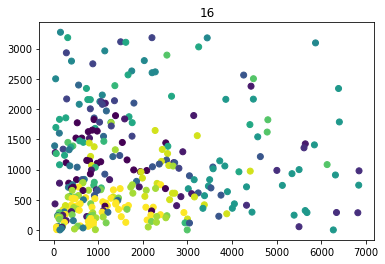

In [40]:
# Your code here
for n_clusters in range(2,17) :
    cluster = KMeans(n_clusters=n_clusters)
    model = cluster.fit(customers_scale)
    customers.n_clusters = model.labels_
    plt.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.n_clusters)
    plt.title(n_clusters)
    plt.show()

In [41]:
# Your comment here
"""
There isn't an evident optimum number of clusters but 7 and 10 seem the better grouped ones, by eye.
"""

"\nThere isn't an evident optimum number of clusters but 7 and 10 seem the better grouped ones, by eye.\n"

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

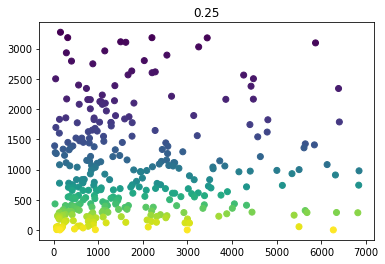

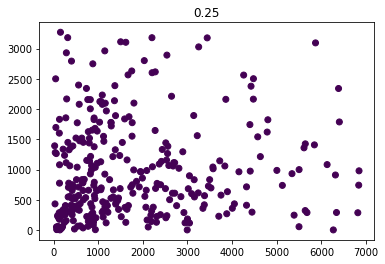

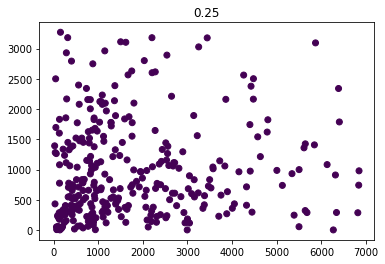

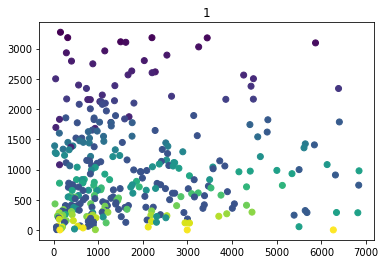

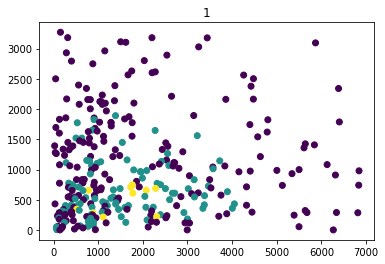

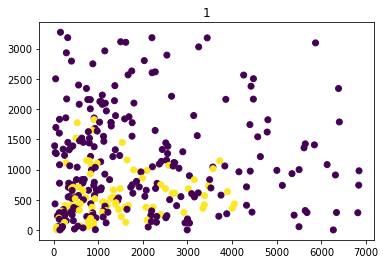

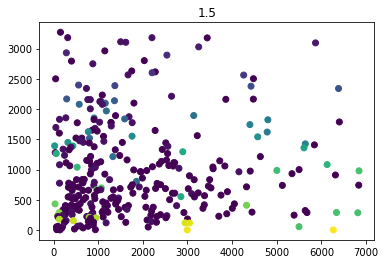

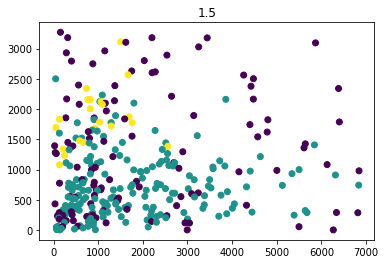

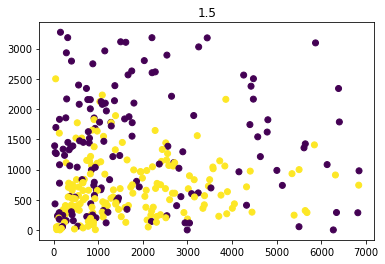

In [44]:
# Your code here
for eps in [0.25,1,1.5] :
    for min_samples in [1,10,15] :
        cluster = DBSCAN(eps=eps, min_samples=min_samples)
        model = cluster.fit(customers_scale)
        customers.eps = model.labels_
        plt.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.eps)
        plt.title(eps)
        plt.show()

In [ ]:
# Your comment here
"""
It seems to make better clusters with lower eps and lower min_samples.
"""